In [1]:
#Borrar esta celda despues de ejecutarla
!pip install numpy
!pip install matplotlib

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from struct import pack, unpack

# Funciones

Para la implementación de las preguntas, considere que **solo** tiene a su disposición las siguientes funciones:

* **np.array(x)**: Convierte **x** en un arreglo de NumPy.
* **np.arange(n)**: Para **n** un número entero positivo entrega un vector de largo **n** con números enteros desde 0 a n-1.
* **np.abs(x)**: Entrega el valor absoluto de **x**.
* **np.power(x)**: Evalúa la expresión $x^n$ si **x** y **n** son escalares. En caso de que **x** e **n** sean vectores, deben tener la misma
dimensión y entrega la evaluación elemento a elemento. Si solo uno de los términos es un vector, entrega el vector donde
el término constante se consideró para cada término de vector.
* **np.sqrt(x)**: Entrega la evaluación de la raíz cuadrada no negativa de un vector o escalar **x**.
* **np.sum(x)**: Entrega la suma de los elementos de un vector **x**.
* **np.sort(x, axis)**: Ordena los elementos de **x** de menor a mayor a lo largo del eje especificado. Si **x** es un vector, entrega un nuevo vector ordenado. Si **x** es una matriz, por defecto (**axis**=-1) ordena cada fila de forma independiente. Puedes usar **axis**=0 para ordenar por columnas y **axis**=1 para ordenar por filas.
* **pack(_format_, _value 1_, _value 2_, ...)**: Retorna un **bytes object**, que permite obtener los octetos de la representacion binaria, el formato es una string formado de dos char, "<" para little-endian y ">" para Big-endian, seguido de la siguiente tabla para los formatos:

    | Format | C Type                | Python Type     | Standard Size |
    |--------|-----------------------|----------------|---------------|
    | x      | pad byte              | no value       |               ||
    | c      | char                  | bytes of length 1 | 1         |
    | b      | signed char           | integer        | 1             |
    | B      | unsigned char         | integer        | 1             |
    | ?      | _Bool                 | bool           | 1             |
    | h      | short                 | integer        | 2             |
    | H      | unsigned short        | integer        | 2             |
    | i      | int                   | integer        | 4             |
    | I      | unsigned int          | integer        | 4             |
    | l      | long                  | integer        | 4             |
    | L      | unsigned long         | integer        | 4             |
    | q      | long long             | integer        | 8             |
    | Q      | unsigned long long    | integer        | 8             |
    | n      | ssize_t               | integer        |               |
    | N      | size_t                | integer        |               |
    | e      | (6)                   | float          | 2             |
    | f      | float                 | float          | 4             |
    | d      | double                | float          | 8             |
    | s      | char[]                | bytes          |               |
    | p      | char[]                | bytes          |               |
    | P      | void*                 | integer        |               |

* **bytes.zfill(_width_)**: Retorna una copia de la secuencia rellenando con "0" hasta hacer la secuencia del largo width.
* **bin(x)**: Convierte un int a una cadena binaria con el prefijo “0b”

# Pregunta 1

1.1 **(35 puntos)** Conociendo el *estándar de punto flotante IEEE 754*, el cual tiene un bit implicito, un bit reservado para el signo, y dependiendo de la precision *x* bits de exponente e *y* bits de mantissa.
Contruya la función `float_to_bin`, la cual recibe como parámetros `number` y `precision`. La función debe retornar el número dado por parámetro en *estándar de punto flotante* según la precisión dada.

*Hint: Python cannot convert a float to an int natively, so the use of `pack()` is recommended. Additionally, you can use Python `f-strings` to manipulate the representation of data.*


In [ ]:
def float_to_bin(number, precision):
    """
    input:
    number          : (float) A number in float python type
    precision       : (int) the representation to use, it can only be 16,
                      32 or 64 bits

    output:
    result_tuple    : (tuple) A tuple containing three binary strings (sign, exponent, and mantissa) 
                              representing a number in the IEEE 754 16-bit, 32-bit or 64-bit floating-point standard.
    """
    #acá va su codigo
    #--------------------------------
    if precision==16:
        numero=np.array(number,dtype=np.float16)
        exp=5
        mantisa=10
        bias=15
    elif precision==32:
        numero=np.array(number,dtype=np.float32)
        exp=8
        mantisa=23
        bias=127
    elif precision==64:
        numero=np.array(number,dtype=np.float64)
        exp=11
        mantisa=52
        bias=1023
    sign = np.sign(numero)
    sign = int(sign < 0)         
    sign = bin(sign)[2:]          
    sign = sign.zfill(1)
    mantissa, exponent = np.frexp(numero)
    exponent = bin(int(exponent + bias))[2:].zfill(exp)
    mantissa = mantissa * 2 - 1
    mantissa = int(mantissa * np.power(2., mantisa))  
    mantissa = bin(mantissa)[2:].zfill(mantisa)
   
    #--------------------------------
    result_tuple = (sign, exponent, mantissa)
    return result_tuple

('1', '10000010', 'b1010100000000000000000000')


1.2 **(10 puntos)** Dado el número decimal $\pi$, obtenga su *error absoluto de redondeo* y su *cota superior* en *half precision*. Finalmente, explique por qué el *error absoluto* de representar un número es proporcional al tamaño del número original.

$$ |fl(x) - x| \leq \frac{1}{2} \cdot \epsilon_{mach}|x| $$

In [20]:
#No modificar este código, solamente ejecute.
float_to_bin(np.pi, 16)

('0', '10001', '1001001000')

In [21]:
#acá va su codigo
#--------------------------------
numero = np.pi  
pi_half = np.array(numero, dtype=np.float16)
err_abs = np.abs(pi_half - numero)
eps_mach = np.power(2., -10)
cota_sup = 0.5 * eps_mach * np.abs(numero)

#--------------------------------
(err_abs, cota_sup)

(np.float16(0.0), np.float64(0.0015339807878856412))

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:** Se debe representar un número que es proporcional al tamaño del original ya que, $\epsilon_{mach}$ corresponde a la presición de la máquina y la distancia que debe hacer entre el número y la precision de la máquina más 1 no debe superar la $\epsilon_{mach}$ 

**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 2

Dada la siguiente función:

$$ f(k) = \frac{\sqrt{k} - 4}{k} $$

Se requiere trabajar con su derivada, pero dado que derivar directamente esta función puede ser muy costoso computacionalmente, es necesario emplear el método de *Diferencias Finitas* para aproximar su derivada. En este caso, utilizaremos la fórmula de *Central Difference*, que se aplica a nuestra función de la siguiente manera:

$$ f'(k, h) = \lim_{h \to 0} \frac{f(k + h) - f(k - h)}{2h} $$

Donde el valor de $h$, representa el tamaño del intervalo utilizado para aproximar la derivada, por lo tanto, $h$ debe ser lo suficientemente pequeño de modo que la aproximación sea precisa y la expresión se acerque al valor real del límite. Un $h$ pequeño reduce el error de la derivada, sin embargo, esta variable no puede ser arbitrariamente pequeña, ya que en *double precision* esto puede introducir problemas de pérdida de importancia y de error de cancelación.

Debido a esto, se define $h$ como una función de una variable x:

$$ h(x) = 2^{-x} $$

Esto implica que a medida que $x$ aumenta, $h(x)$ se hace exponencialmente más pequeño.

Dados estos cambios, se obtiene la siguiente función:

$$ f'(k, x) = \frac{\frac{\sqrt{k + 2^{-x}} - 4}{k + 2^{-x}} - \frac{\sqrt{k - 2^{-x}} - 4}{k - 2^{-x}}}{2 \cdot 2^{-x}} $$

Sean $g_1(k, h)$ y $g_2(k, h)$, el primer y segundo término del numerador de la función $f'(k, x)$, respectivamente. Estas funciones quedan definidas como:

$$ g_1(k, x) = \frac{\sqrt{k + 2^{-x}} - 4}{k + 2^{-x}} $$

$$ g_2(k, x) = \frac{\sqrt{k - 2^{-x}} - 4}{k - 2^{-x}} $$

Donde se considerará un valor de *k* fijo y un valor de x variable con el objetivo de analizar el comportamiento de dicha función según el valor de este último parámetro.

In [3]:
#No modificar este código, solamente ejecute.
g1 = lambda k, x: (np.sqrt(k + np.power(2., -x)) - 4)/(k + np.power(2., -x))
g2 = lambda k, x: (np.sqrt(k - np.power(2., -x)) - 4)/(k - np.power(2., -x))
f_prime = lambda k, x: (g1(k, x) - g2(k, x))/(2*np.power(2., -x))

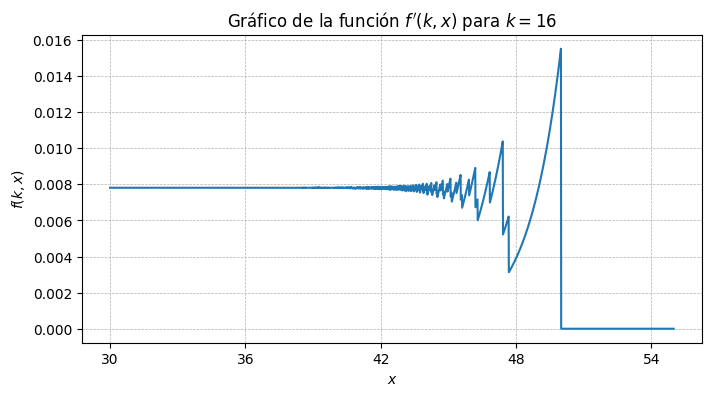

In [10]:
#No modificar este código, solamente ejecute.
k = 16
x = np.arange(30, 55, 0.01)

plt.figure(figsize=(8, 4))
plt.plot(x, f_prime(k, x))

plt.xlabel("$x$")
plt.ylabel("$f(k, x)$")
plt.title("Gráfico de la función $f'(k, x)$ para $k = 16$")
plt.xticks(np.arange(30, 55, 6))

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

2.1 **(40 puntos)** Encuentre el menor $x \in \mathbb{N}$ tal que las funciones $g_1(k, x)$, $g_2(k, x)$ y $f'(k, x)$ sean iguales a $0$ en *double precision* para un valor fijo $k = 16$ (Evalúe cada caso para cada función).

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:** Analizando el gráfico,se puede observar que el menor número x que da 0 es el 51 aproximadamente, esto debido a que al evaluar en las funciones $g_1(k, x)$, $g_2(k, x)$ para ese número, nos da que hay pérdida de importancia, dando como resultado 0 a partir de ese número en adelante 

**---------------------------------------------------------------------------------------------------------------------------**

2.2 **(15 puntos)** Construya la función `gap_non_representable`, la cual recibe como parámetro el número `num_ieee754` en *estándar de punto flotante de 64 bits*. La función debe retornar el tamaño del *gap* o *distancia* para la suma y la resta, donde ocurra *pérdida de importancia*.

In [30]:
def gap_non_representable(num_ieee754):
    """
    input:
    num_ieee754    : (tuple) A tuple containing three binary strings (sign, exponent, and mantissa) 
                             representing a number in the IEEE 754 64-bit floating-point standard.

    output:
    result_str     : (str) A string in the format "2^(-exp_pos), 2^(-exp_neg)", where:
                            - exp_pos is the exponent that represents the gap between the number and the next non-representable number greater than it.
                            - exp_neg is the exponent that represents the gap between the number and the next non-representable number less than it.
    """
    #acá va su codigo
    #--------------------------------
    signo,exponente,mantisa= num_ieee754
    bits=signo+exponente+mantisa
    cant_bits=int(bits,2)
    packed = cant_bits.to_bytes(8, byteorder='big')
    numero = np.array(np.frombuffer(packed, dtype='>f8')[0])
    mantisa, exponente = np.frexp(numero)

    exp_pos = 52 - exponente
    exp_neg = 52 - exponente
    #--------------------------------
    result_str = f"2^{{-{exp_pos}}}, 2^{{-{exp_neg}}}"
    return result_str

In [31]:
#No modificar este código, solamente ejecute.
num_ieee754 = float_to_bin(16.0, 64)
gap_non_representable(num_ieee754)

'2^{-46}, 2^{-46}'